# 4.- Euler-Maruyama class

In the previous notebook, we explained the essential concepts required to understand the Euler-Maruyama (EM) method. We also analysed the approximation error of the EM method with a basic example. To compute this example, we had to run several times a collection of Python functions. To simplify this process, we can resort to a Python class. The aim of this notebook is to show a basic Python class implementation of the EM method. We will highlight the benefits that the class provides in terms of modularity and code reusability.

## Contents
### [A. The Euler-Maruyama class](#em-class)
### [B. Inheritance](#inheritance)
### [C. Coefficient class](#coefficient)

<a id="sde"></a>
### A. The Euler-Maruyama class

The EM class has been implemented in a separated file: `src/euler_maruyama/euler_maruyama.py`. First of all, we can import it to use in this notebook. To import the class, we need to have installed the Python package previously. We refer to README.md of this repository to correctly set up the package in you preferred local environment.

In [1]:
import matplotlib.pyplot as plt

from euler_maruyama import EulerMaruyama

In [2]:
# Print the class docstring to show its information
print(EulerMaruyama.__doc__)

Class to perform the numerical solution of a Stochastic Differential Equation (SDE) through the Euler-Maruyama method.

    Considering a SDE of the form: dX_t = mu(X_t, t)dt + sigma(X_t, t)dW_t, the solution of this SDE over
    the time interval [t_0, t_n] can be approximated as follows:

                    Y_{n+1} = Y_n + mu(Y_n, tau_n)(tau_{n+1} -  tau_n) + sigma(Y_n, tau_n)(W_{tau_{n+1}} - W_{tau_n})

    with initial condition Y_0 = X_0 and where the time interval is discretised:

                    t_0 = tau_0 < tau_1 <  ... < tau_n  = t_n

    with Delta_t = tau_{n+1} - tau_n = (t_n - t_0) / n and DeltaW_n = (W_{tau_{n+1}} - W_{tau_n}) ~ N(0, Delta_t)
    because W_t is a Wiener process, so-called Brownian motion.

    Parameters
    ----------
    t_0: float
        Initial time.

    t_n: float
        Final time.

    n_steps: int
        Number of time steps to discretise the time interval [t_0, t_n].

    X_0: float
        Initial condition of the SDE.

    drift: Coeff

In [3]:
# Also import already drift and diffusion Coefficients
# We will discuss this in detail

from euler_maruyama import ConstantDiffusion, LinearDrift

linear_drift = LinearDrift(a=1)  # drift (mu) = 1*t
constant_diffusion = ConstantDiffusion(b=2.5)  # diffusion (sigma) = 2.5 

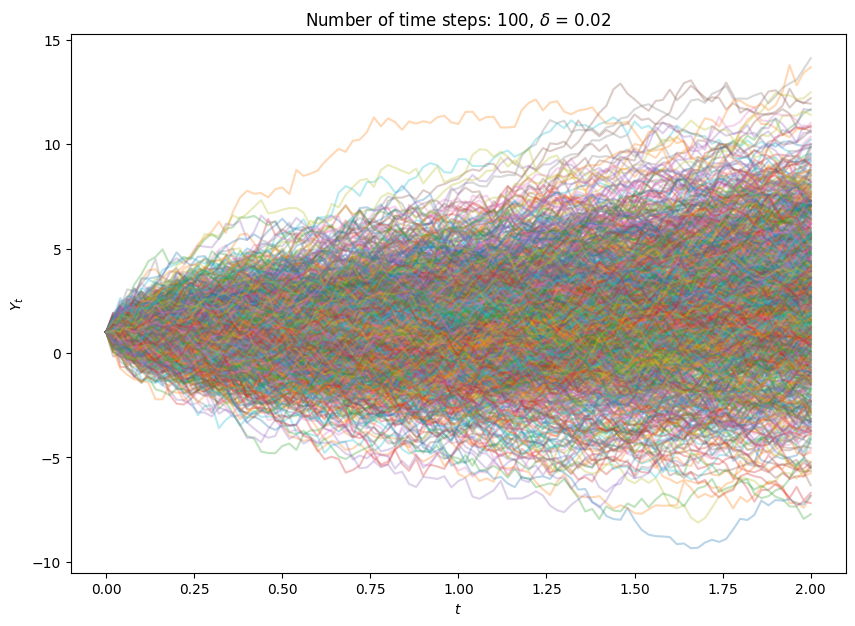

In [4]:
# Run one solution with 1000 simulated approximations
em = EulerMaruyama(t_0=0, t_n=2, n_steps=100, X_0=1, drift=linear_drift, diffusion=constant_diffusion, n_sim=1_000)
Y = em.compute_numerical_approximation()

title=f"Number of time steps: {em.n_steps}, $\delta$ = {em.delta}"
em.plot_approximation(title=title)

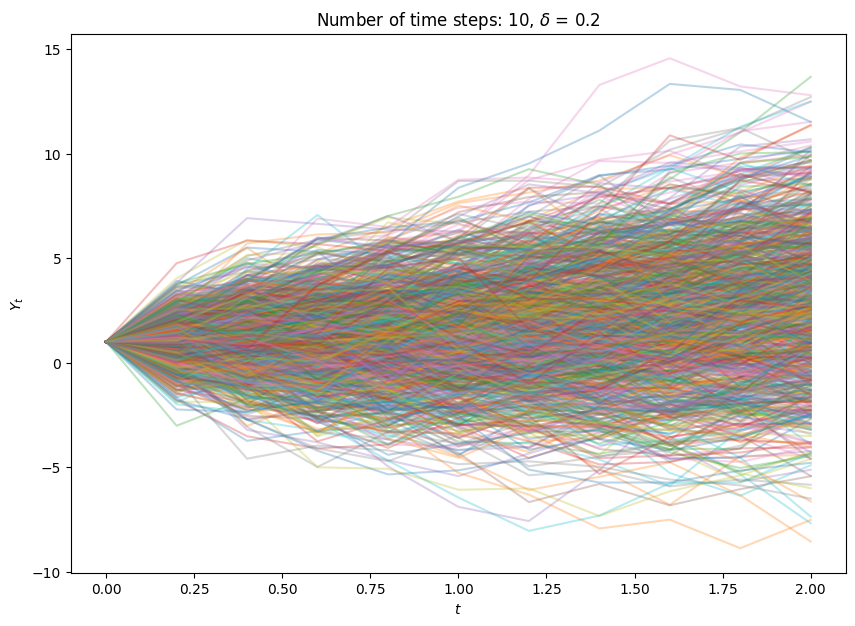

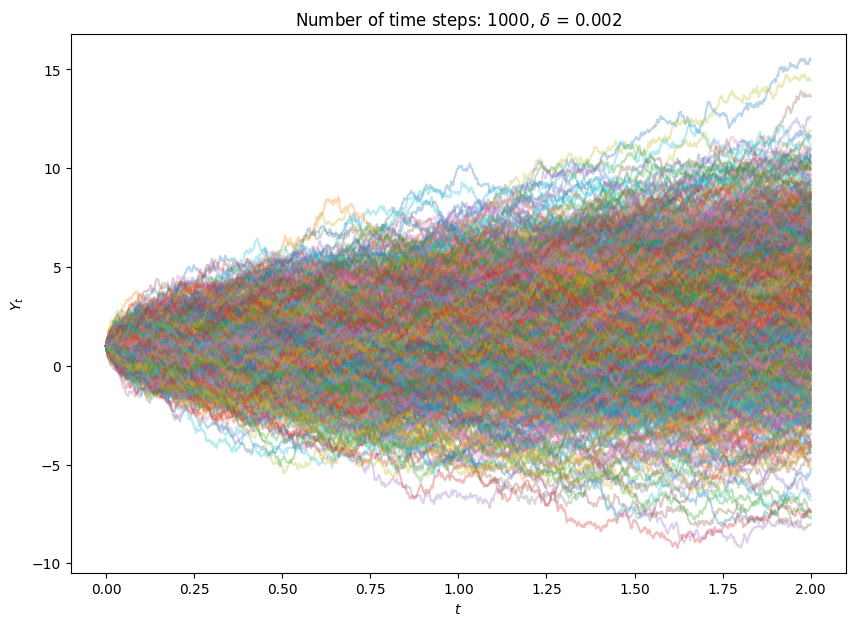

In [5]:
# We can see how easy is to change parameters thanks to the class init
em = EulerMaruyama(t_0=0, t_n=2, n_steps=10, X_0=1, drift=linear_drift, diffusion=constant_diffusion, n_sim=1_000)
Y = em.compute_numerical_approximation()
title=f"Number of time steps: {em.n_steps}, $\delta$ = {em.delta}"
em.plot_approximation(title=title)

em = EulerMaruyama(t_0=0, t_n=2, n_steps=1000, X_0=1, drift=linear_drift, diffusion=constant_diffusion, n_sim=1_000)
Y = em.compute_numerical_approximation()
title=f"Number of time steps: {em.n_steps}, $\delta$ = {em.delta}"
em.plot_approximation(title=title)

This is really good. By encapsulating the logic of the EM method, we are able to efficiently solve the SDE. Additionaly, the class helps us to analyse the obtained solution when modifying different parameters of the EM method. 

<a id="inheritance"></a>
### B. Inheritance

So far, we have seen the benefits of using the `EulerMaruyama` class for our project. However, to analyse the perfomance of the EM method, we need to change the parameters of the `EulerMaruyama` class. This change requires us to input all parameters again in the class init method. This might seem a bit tedious. We would like to find a way to change only one parameter but keeping the rest unchanged. For this purpose, we introduce another Python class that replicates the desired functionality. Based on this new class, we introduce the concept of class inheritance. Note that our example is really simple.

This class is based on the `EulerMaruyama` class that we have commented in the previous section. 

In [6]:
from euler_maruyama import CustomEulerMaruyama

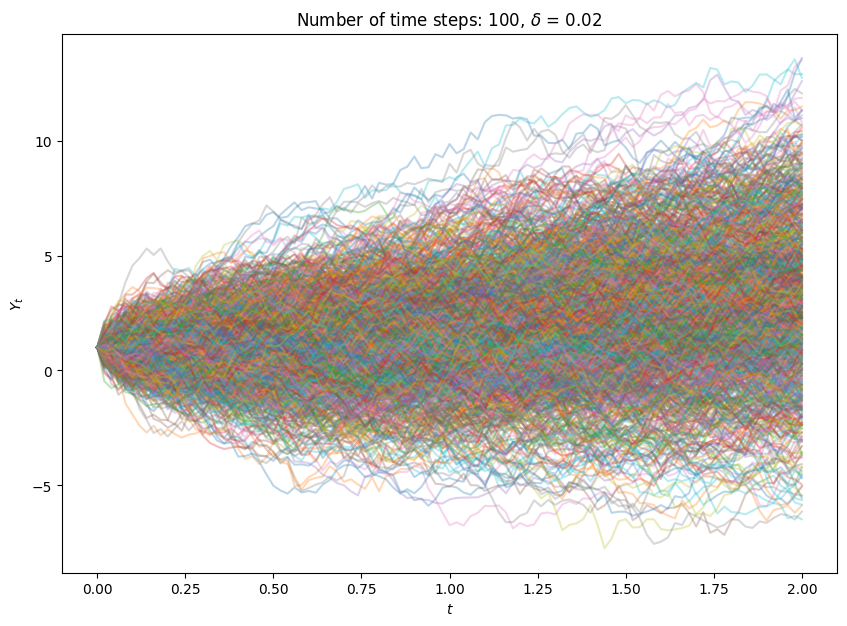

In [7]:
custom_em = CustomEulerMaruyama(t_0=0, t_n=2, n_steps=100, X_0=1, drift=linear_drift, diffusion=constant_diffusion, n_sim=1_000)
Y = custom_em.compute_numerical_approximation()

title=f"Number of time steps: {custom_em.n_steps}, $\delta$ = {custom_em.delta}"
custom_em.plot_approximation(title=title)

Explain inheritance

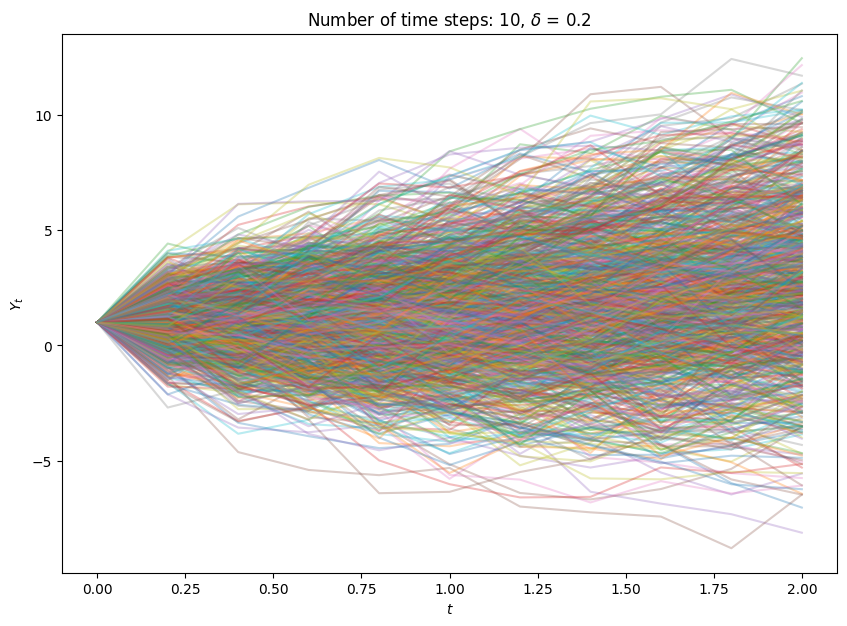

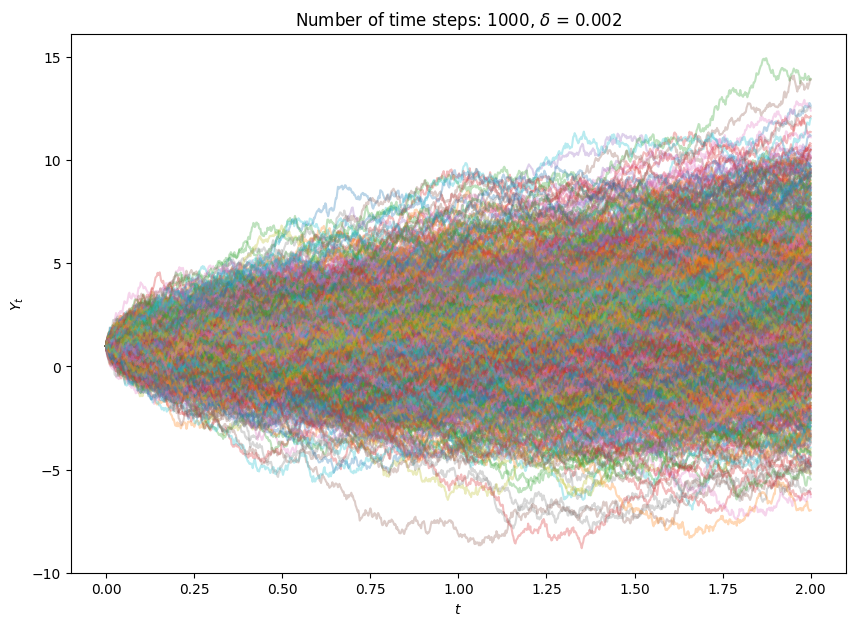

In [8]:
# But we can change the number of time steps more straightforward, keeping the rest of parameters
custom_em.change_n_steps(new_n_steps=10)
Y = custom_em.compute_numerical_approximation()

title=f"Number of time steps: {custom_em.n_steps}, $\delta$ = {custom_em.delta}"
custom_em.plot_approximation(title=title)

custom_em.change_n_steps(new_n_steps=1000)
Y = custom_em.compute_numerical_approximation()

title=f"Number of time steps: {custom_em.n_steps}, $\delta$ = {custom_em.delta}"
custom_em.plot_approximation(title=title)

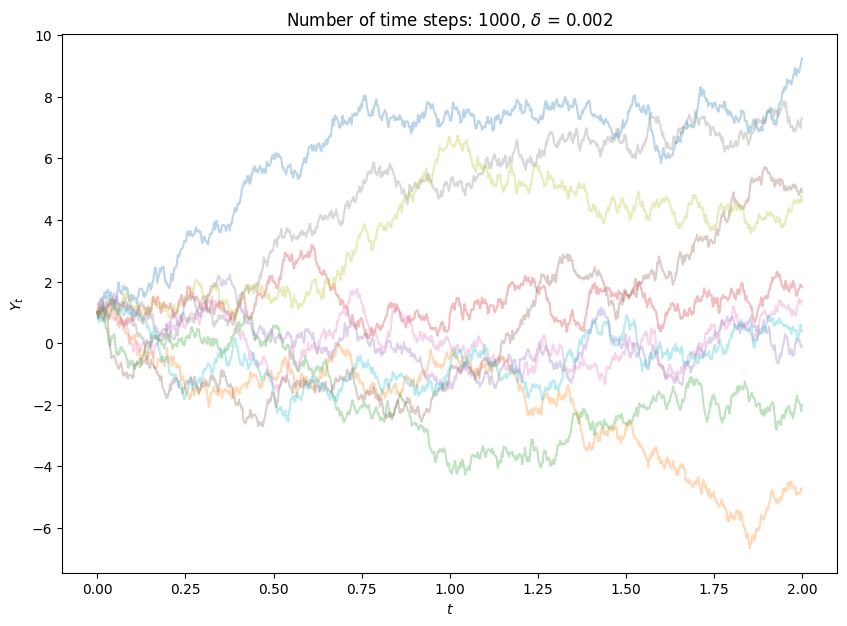

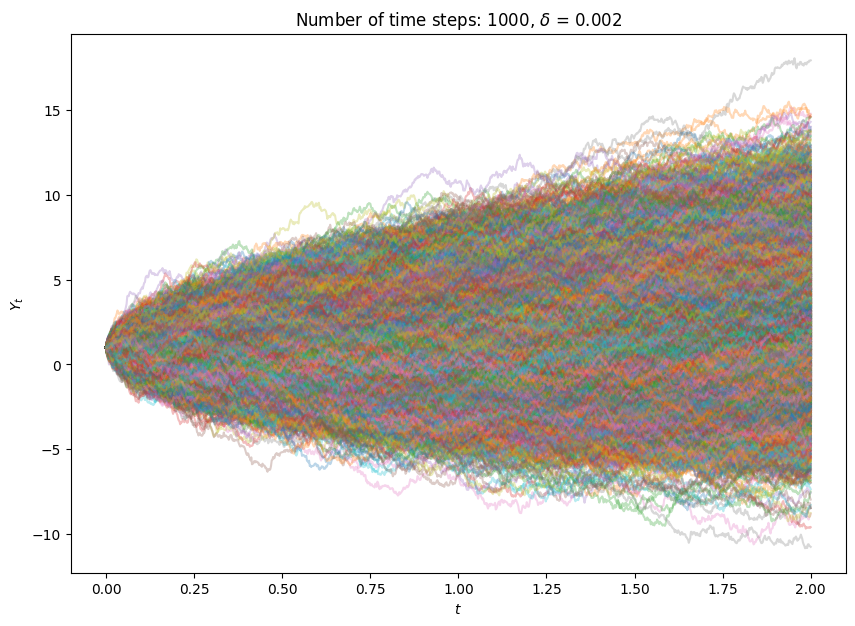

In [9]:
# And repeat the process with the number of simulations
custom_em.change_n_sim(new_n_sim=10)
Y = custom_em.compute_numerical_approximation()

title=f"Number of time steps: {custom_em.n_steps}, $\delta$ = {custom_em.delta}"
custom_em.plot_approximation(title=title)

custom_em.change_n_sim(new_n_sim=10000)
Y = custom_em.compute_numerical_approximation()

title=f"Number of time steps: {custom_em.n_steps}, $\delta$ = {custom_em.delta}"
custom_em.plot_approximation(title=title)

#### Comment Coefficients class